In [2]:
from scipy import io as spio
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Dropout, Flatten, Input

emnist = spio.loadmat("../matlab/emnist-letters.mat")


# load training dataset
x_train = emnist["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)
x_train = x_train / 255
# load training labels
y_train = emnist["dataset"][0][0][0][0][0][1]

# load test dataset
x_test = emnist["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)
x_test = x_test / 255
# load test labels
y_test = emnist["dataset"][0][0][1][0][0][1]

In [11]:
def convolutional_autoencoder():
    inputs = Input(shape=(28, 28, 1))
    model = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    model = MaxPooling2D(padding='same')(model)
    model = Conv2D(8, 3, activation='relu', padding='same')(model)
    #model = MaxPooling2D(padding='same')(model)
    #model = Conv2D(8, 3, activation='relu', padding='same')(model)
    encoded_input_dataset = MaxPooling2D(padding='same')(model)
  
    model = Conv2D(8, 3, activation='relu', padding='same')(encoded_input_dataset)
    model = UpSampling2D()(model)
    #model = Conv2D(8, 3, activation='relu', padding='same')(model)
    #model = UpSampling2D()(model)
    model = Conv2D(16, 3, activation='relu', padding = 'same')(model)
    model = UpSampling2D()(model)
    decoded_ = Conv2D(1, 3, activation='sigmoid', padding='same')(model)
                                       
    autoencoder = Model(inputs,decoded_)                                     
    autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
                                       
    return autoencoder

In [12]:
autoencoder = convolutional_autoencoder()
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 8)         0   

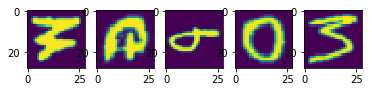

In [13]:
def add_noise(data, noise = 0.3):
    data = data + np.random.randn(* data.shape) * noise
    data = data.clip(0., 1.)
    return data
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28))

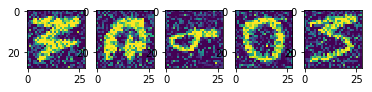

In [14]:
x_train_noise = add_noise(x_train[:, :])
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train_noise[i].reshape(28, 28))

In [15]:
autoencoder.fit(x_train_noise.reshape(124800, 28, 28, 1), x_train.reshape(124800, 28, 28, 1), epochs = 30, validation_data = (x_train_noise.reshape(124800, 28, 28, 1), x_train.reshape(124800, 28, 28, 1)))


Train on 124800 samples, validate on 124800 samples
Epoch 1/30
124800/124800 [==============================] - 131s 1ms/step - loss: 0.1479 - val_loss: 0.1340
Epoch 2/30
124800/124800 [==============================] - 133s 1ms/step - loss: 0.1321 - val_loss: 0.1310
Epoch 3/30
124800/124800 [==============================] - 129s 1ms/step - loss: 0.1302 - val_loss: 0.1297
Epoch 4/30
124800/124800 [==============================] - 120s 959us/step - loss: 0.1293 - val_loss: 0.1288
Epoch 5/30
124800/124800 [==============================] - 119s 953us/step - loss: 0.1287 - val_loss: 0.1283
Epoch 6/30
124800/124800 [==============================] - 119s 954us/step - loss: 0.1283 - val_loss: 0.1282
Epoch 7/30
124800/124800 [==============================] - 120s 961us/step - loss: 0.1281 - val_loss: 0.1280
Epoch 8/30
124800/124800 [==============================] - 120s 958us/step - loss: 0.1279 - val_loss: 0.1276
Epoch 9/30
124800/124800 [==============================] - 119s 953us/st

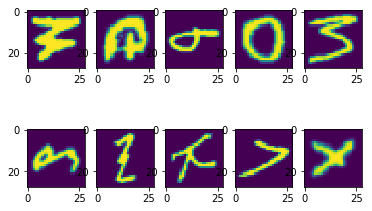

In [16]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28))

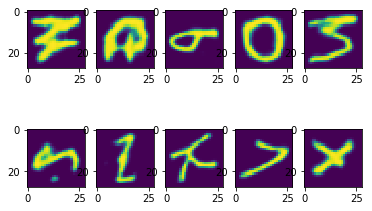

In [17]:
pred = autoencoder.predict(x_train_noise.reshape(124800, 28, 28, 1))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pred[i].reshape(28, 28))

In [18]:
autoencoder.save('2 layer.h5')